Problem 1

(array([1.000e+00, 1.000e+00, 2.000e+00, 6.000e+00, 6.000e+00, 8.000e+00,
        1.200e+01, 2.200e+01, 2.500e+01, 2.300e+01, 2.900e+01, 2.300e+01,
        4.500e+01, 5.600e+01, 5.400e+01, 6.100e+01, 7.100e+01, 7.100e+01,
        8.500e+01, 1.020e+02, 1.120e+02, 1.110e+02, 1.310e+02, 1.320e+02,
        1.630e+02, 1.470e+02, 1.720e+02, 1.950e+02, 1.930e+02, 2.070e+02,
        2.320e+02, 2.370e+02, 2.710e+02, 2.650e+02, 3.190e+02, 3.020e+02,
        3.360e+02, 3.130e+02, 3.570e+02, 3.470e+02, 4.260e+02, 4.420e+02,
        4.310e+02, 4.960e+02, 4.640e+02, 5.140e+02, 5.150e+02, 5.510e+02,
        5.670e+02, 6.340e+02, 6.900e+02, 6.570e+02, 7.100e+02, 6.840e+02,
        7.550e+02, 7.830e+02, 7.890e+02, 8.420e+02, 8.970e+02, 8.840e+02,
        9.500e+02, 9.940e+02, 1.025e+03, 1.115e+03, 1.117e+03, 1.247e+03,
        1.179e+03, 1.257e+03, 1.294e+03, 1.326e+03, 1.450e+03, 1.458e+03,
        1.470e+03, 1.513e+03, 1.611e+03, 1.670e+03, 1.738e+03, 1.769e+03,
        1.858e+03, 1.937e+03, 1.954e+0

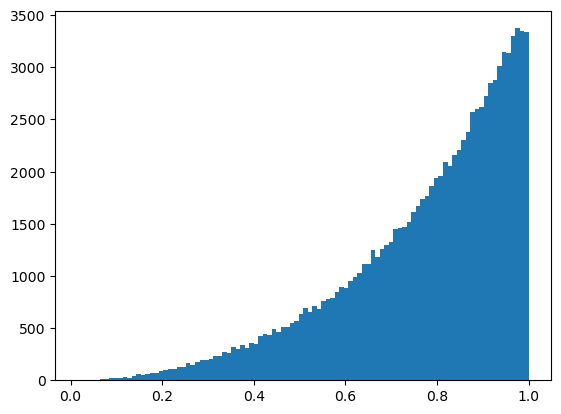

In [111]:
import numpy as np
import matplotlib.pyplot as plt

def problem1_inversion(n_samples=1000):
# Distribution from part 1
# write the code in this function to produce samples from the distribution in the assignment
# Make sure you choose a good sampling distribution to avoid unnecessary rejections
# Return a numpy array of length n_samples

    accepted_samples = []

    target = lambda x: np.clip((np.exp(x**2) - 1) / (np.e - 1), 0, 1)
    proposal = lambda x: 1

    while len(accepted_samples) < n_samples:
        x = np.random.uniform(1e-6, 1)
        u = np.random.uniform(1e-6, 1)  # Uniform random for acceptance criterion
        
        if u <= 1.1*target(x):
            accepted_samples.append(x)  # Accept x
    
    return np.array(accepted_samples)

accepted_samples = problem1_inversion(n_samples=100000)

plt.hist(accepted_samples, bins=100)

Problem 2 (This is exacly the same as an assignment)

Problem 3

Problem 4

Problem 5